# **Eye Cancer Patients  Jupyter Notebook**

**Section**: S20 <br>

**Group**: pandas Salle

# **Dataset Description**

The chosen data set titled "Eye Cancer Patient Records" provides detailed medical records for 5,000 patients diagnosed with 3 different types of eye cancer namely, Melanoma, Retinoblastoma, and Lymphoma. The dataset was retrieved from Kaggle and is designed for machine learning projects, statistical modeling, and healthcare research.


### **Import the necessary libraries**

For Data Visualization and Data processing


In [269]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### **Initializing the DataFrame**

Load the Eye Cancer Patients Dataset into a pandas DataFrame


In [270]:
eye_cancer_df = pd.read_csv('eye_cancer_patients.csv')
eye_cancer_df.head()

,Patient_ID,Age,Gender,Cancer_Type,Laterality,Date_of_Diagnosis,Stage_at_Diagnosis,Treatment_Type,Surgery_Status,Radiation_Therapy,Chemotherapy,Outcome_Status,Survival_Time_Months,Genetic_Markers,Family_History,Country
0,PID00001,58,F,Retinoblastoma,Left,2019-01-25,Stage IV,Radiation,False,15,3,Deceased,85,NaN,True,UK
1,PID00002,15,Other,Retinoblastoma,Right,2021-10-21,Stage III,Chemotherapy,True,69,6,In Remission,10,NaN,True,Japan
2,PID00003,64,M,Retinoblastoma,Bilateral,2021-03-12,Stage IV,Surgery,False,47,6,In Remission,3,BRAF Mutation,False,UK
3,PID00004,33,M,Melanoma,Right,2021-05-10,Stage II,Radiation,True,36,6,Active,40,NaN,False,Canada
4,PID00005,8,Other,Lymphoma,Left,2019-11-24,Stage I,Chemotherapy,False,14,14,In Remission,26,BRAF Mutation,True,USA


### **Preparing to Clean up the Data**

Check the information regarding the Dataset


In [271]:
eye_cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Patient_ID            5000 non-null   object
 1   Age                   5000 non-null   int64 
 2   Gender                5000 non-null   object
 3   Cancer_Type           5000 non-null   object
 4   Laterality            5000 non-null   object
 5   Date_of_Diagnosis     5000 non-null   object
 6   Stage_at_Diagnosis    5000 non-null   object
 7   Treatment_Type        5000 non-null   object
 8   Surgery_Status        5000 non-null   bool  
 9   Radiation_Therapy     5000 non-null   int64 
 10  Chemotherapy          5000 non-null   int64 
 11  Outcome_Status        5000 non-null   object
 12  Survival_Time_Months  5000 non-null   int64 
 13  Genetic_Markers       2503 non-null   object
 14  Family_History        5000 non-null   bool  
 15  Country               5000 non-null   

#### **Data preprocessing**
We will want to remove the `nan` values so that when we do Exploratory Data Analysis later, we will not encounter isues<br>
First let us check if we missed any variables with a `nan` value

In [272]:
nan_variables = eye_cancer_df.columns[eye_cancer_df.isnull().any()].to_list()
print(nan_variables)

['Genetic_Markers']


> For this dataset, it seems like `Genetic_Markers` is the only variable that has a `nan` value, so we may proceed with the cleaning up of the data.

#### **Do we drop or replace the** `nan` **values from** `Genetic_Markers` **variable?**
Dropping the rows with `nan` values in `Genetic_Markers` would be more convenient, but first let us check if we still have sufficient data if ever we drop them<br>
So our task is to count how many of the rows are affected by the `nan` values.

In [273]:
nan_count = eye_cancer_df['Genetic_Markers'].isnull().sum()

print("The count of NaN values in Genetic_Markers is:", nan_count)

The count of NaN values in Genetic_Markers is: 2497


> Let us check the shape of our pandas DataFrame: `eye_cancer_df` 

In [274]:
eye_cancer_df.shape
print("Our Data frame has {} rows and {} columns.".format(eye_cancer_df.shape[0], eye_cancer_df.shape[1]))

Our Data frame has 5000 rows and 16 columns.


> We know we have 5000 observations, and according to the count of our `nan` values in the `Genetic_Markers` variable, 2497 rows are affected by these `nan` values. <br> <br>
> Therefore, we cannot proceed with the dropping since it will affect about half of our observations. <br> <br>
> Instead let us, replace these `nan` values with another categorical data as `None`.

In [275]:
eye_cancer_df.loc[eye_cancer_df['Genetic_Markers'].isnull(), 'Genetic_Markers'] = 'None'

#### ⚠️ **Sanity Check !!**
Let us see if the `nan` values in the `Genetic_Markers` variables have been replace with `None`

In [276]:
replaced = eye_cancer_df.loc[eye_cancer_df['Genetic_Markers'] == 'None', 'Genetic_Markers'].shape[0]
not_replaced = eye_cancer_df['Genetic_Markers'].isnull().sum()
print("The number of rows where the nan values in Genetic_Markers variable that has been replaced with 'None' is: {} rows".format(replaced))
print("Meanwhile the number of rows that are still containg nan values is: {} rows".format(not_replaced))

The number of rows where the nan values in Genetic_Markers variable that has been replaced with 'None' is: 2497 rows
Meanwhile the number of rows that are still containg nan values is: 0 rows


The `2497` rows that has been successfully replaced with `None` in the `Genetic_Markers` variable is parallel with the number of rows that was originally `nan` values in `Genetic_Markers`

#### **Next let's check if there are duplicate values in our categorical data**
To do this we can loop over the columns of our pandas DataFrame and then check the Unique Values

In [277]:
for col in eye_cancer_df.columns:
    if eye_cancer_df[col].dtype == 'object' and col != 'Date_of_Diagnosis' and col != 'Patient_ID':
        print(f"Unique values in {col}: {eye_cancer_df[col].unique()}")
        print()

Unique values in Gender: ['F' 'Other' 'M']

Unique values in Cancer_Type: ['Retinoblastoma' 'Melanoma' 'Lymphoma']

Unique values in Laterality: ['Left' 'Right' 'Bilateral']

Unique values in Stage_at_Diagnosis: ['Stage IV' 'Stage III' 'Stage II' 'Stage I']

Unique values in Treatment_Type: ['Radiation' 'Chemotherapy' 'Surgery']

Unique values in Outcome_Status: ['Deceased' 'In Remission' 'Active']

Unique values in Genetic_Markers: ['None' 'BRAF Mutation']

Unique values in Country: ['UK' 'Japan' 'Canada' 'USA' 'Australia' 'Germany' 'South Africa' 'Brazil'
 'France' 'India']



> Since there are no duplicate values

#### **EDA Question 1: How does survival time vary by cancer type?**

To visualize if survival time varies with the cancer type, let's use a box and whisker plot. <br>
While we're at it, let's check what would be the `Median` of `Survival_Time_Months` of our Dataset of Eye Cancer Patients regardless of `Cancer_Type` and Visualize it.


In [278]:
rangE = eye_cancer_df['Survival_Time_Months'].max() - eye_cancer_df['Survival_Time_Months'].min()
midpoint = range/2
mode = eye_cancer_df['Survival_Time_Months'].mode()
count =  eye_cancer_df['Survival_Time_Months'].value_counts()

Survival_Time_desc = eye_cancer_df['Survival_Time_Months'].agg(['mean', 'median', 'std'])
Survival_Time_desc['mode'] = [int(x) for x in mode]
Survival_Time_desc['range'] = rangE
Survival_Time_desc['midpoint'] = midpoint
Survival_Time_desc

mean           60.716
median           60.0
std         34.549774
mode         [52, 71]
range             119
midpoint         59.5
Name: Survival_Time_Months, dtype: object

> Just from these description of the DataSet, our `mean` and `median` are very close together. This suggests that the distribution of `Survival_Time_Months` of all our Eye Cancer Patients in the DataFrame is approximately symmetrical. <br> 

Let's check the distribution of the `Survival_Time_Months` series using a `Histogram` plot.


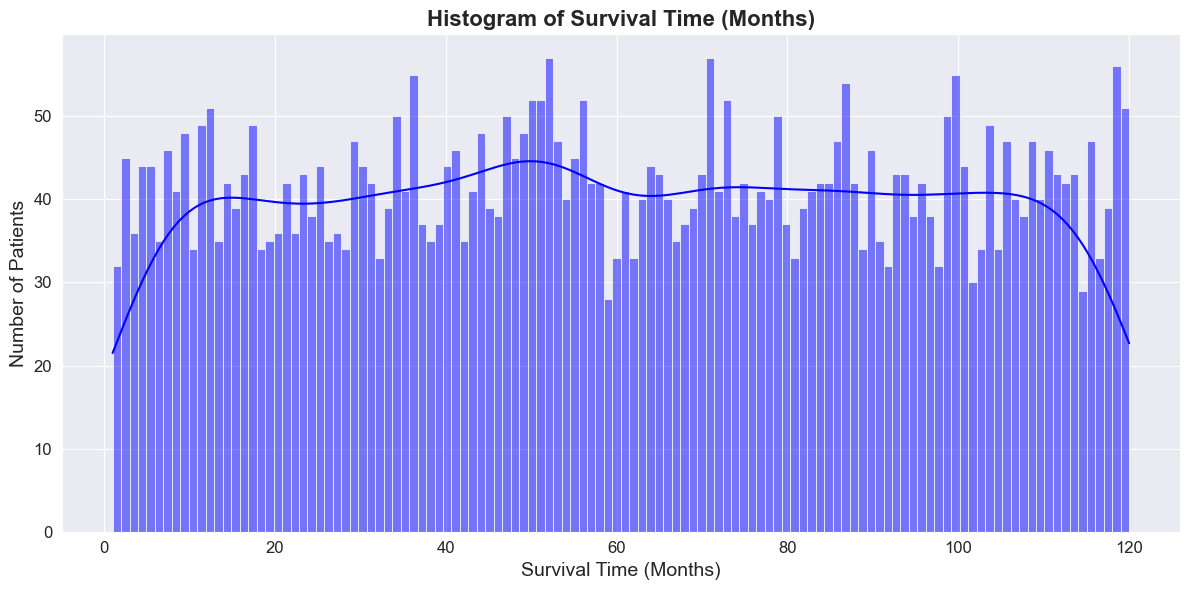

In [279]:
plt.style.use('dark_background')
sns.set_style("darkgrid")

plt.figure(figsize=(12, 6))
sns.histplot(
    data=eye_cancer_df,
    x='Survival_Time_Months',
    kde=True,
    bins=120,
    color='blue',
    edgecolor='white'
)
plt.title('Histogram of Survival Time (Months)', fontsize=16, fontweight='bold')
plt.xlabel('Survival Time (Months)', fontsize=14)
plt.ylabel('Number of Patients', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

According to what we can observe from the `Histogram` and the `Kernel Density Estimate`, we can see that the distribution of `Survival_Time_Months` series for all Eye Cancer Types have multiple modes, but what is prominent here is that the probability of observing a survival time close to our `mean` and `median` (~60), which seems to be the highest peak in the `Kernel Density Estimate`.

> Going back to what we stated earlier, the graph also seems to be approximately symmetrical around the `Survival_Time_Months` of `60` which is where our `mean` and `median` are located (approximately speaking).

Let's now explore the `Survival_Time_Months` of each `Cancer_Type` and summarize the data

In [280]:
# Extract each Cancer Types
lymphoma_df = eye_cancer_df[eye_cancer_df['Cancer_Type'] == 'Lymphoma']
melanoma_df = eye_cancer_df[eye_cancer_df['Cancer_Type'] == 'Melanoma']
retinoblastoma_df = eye_cancer_df[eye_cancer_df['Cancer_Type'] == 'Retinoblastoma']

# Get the Survival_Time_Months series for each cancer type
lymphoma_survival_df =  lymphoma_df['Survival_Time_Months']
melanoma_survival_df = melanoma_df['Survival_Time_Months']
retinoblastoma_survival_df = retinoblastoma_df['Survival_Time_Months']


# Summarize the survival time for each cancer type
lymphoma_survival_summary = lymphoma_survival_df.agg(['mean', 'median', 'std'])
lymphoma_survival_summary['mode'] = [int(x) for x in lymphoma_survival_df.mode()]
lymphoma_survival_summary['range'] = lymphoma_survival_df.max() - lymphoma_survival_df.min()
lymphoma_survival_summary['midpoint'] = lymphoma_survival_summary['range'] / 2

melanoma_survival_summary = melanoma_survival_df.agg(['mean', 'median', 'std'])
melanoma_survival_summary['mode'] = [int(x) for x in melanoma_survival_df.mode()]
melanoma_survival_summary['range'] = melanoma_survival_df.max() - melanoma_survival_df.min()
melanoma_survival_summary['midpoint'] = melanoma_survival_summary['range'] / 2

retinoblastoma_survival_summary = retinoblastoma_survival_df.agg(['mean', 'median', 'std'])
retinoblastoma_survival_summary['mode'] = [int(x) for x in retinoblastoma_survival_df.mode()]
retinoblastoma_survival_summary['range'] = retinoblastoma_survival_df.max() - retinoblastoma_survival_df.min()
retinoblastoma_survival_summary['midpoint'] = retinoblastoma_survival_summary['range'] / 2

# Combine the summaries into a single DataFrame
cancer_survival_summary = pd.DataFrame({
    'Lymphoma': lymphoma_survival_summary,
    'Melanoma': melanoma_survival_summary,
    'Retinoblastoma': retinoblastoma_survival_summary
})

cancer_survival_summary

,Lymphoma,Melanoma,Retinoblastoma
mean,60.373855,60.998226,60.76555
median,58.0,61.0,61.0
std,34.457862,34.640188,34.56589
mode,[55],[99],[71]
range,119,119,119
midpoint,59.5,59.5,59.5


As we can see from the table, the `mean` and `median` of each `unique` of `Cancer_Type` varies slightly from one another. Since this is just pure EDA we can save the `ANOVA` for later analysis (phase 2)

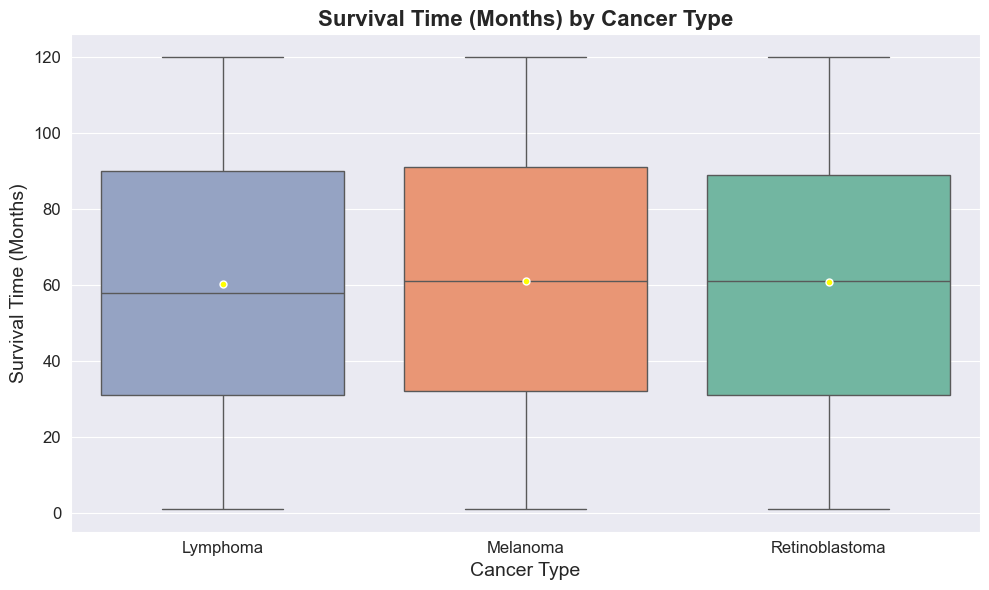

In [281]:
plt.style.use('dark_background')
sns.set_style("darkgrid")

plt.figure(figsize=(10, 6))
sns.boxplot(
    data=eye_cancer_df,
    x='Cancer_Type',
    y='Survival_Time_Months',
    hue='Cancer_Type',  
    palette='Set2',
    legend=False,       
    showmeans=True,
    meanprops=dict(marker=".", markerfacecolor="yellow", markeredgecolor="white", markersize=10),
    order=sorted(eye_cancer_df['Cancer_Type'].unique())
)
plt.title('Survival Time (Months) by Cancer Type', fontsize=16, fontweight='bold')
plt.xlabel('Cancer Type', fontsize=14)
plt.ylabel('Survival Time (Months)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

#### **EDA Question 2: At which stage does each cancer type typically get diagnosed?**
This can give insights in which Eye Cancer Types are easily diagnosed and which types needs improvement for diagnosis techniques
> For this we can simply groupby `Cancer Types` the DataFrame and then index it at `Stage_at_Diagnosis` then use the `describe()` methods of a pandas DataFrame

In [282]:
eye_cancer_df.groupby('Cancer_Type')['Stage_at_Diagnosis'].describe()

,count,unique,top,freq
Cancer_Type,,,,
Lymphoma,1637,4,Stage II,424
Melanoma,1691,4,Stage II,440
Retinoblastoma,1672,4,Stage III,448


> As we can see, the diagnosis for Retinoblastoma Eye Cancer needs improvement, the earlier the diagnosis the better chances of survival we can give to the Patients. <br>

We will now want to plot the various `Stage_at_Diagnosis` of each `Cancer_Type` so we can see the distribution for each Cancer Types

C:\Users\alter\AppData\Local\Temp\ipykernel_21776\2969232934.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


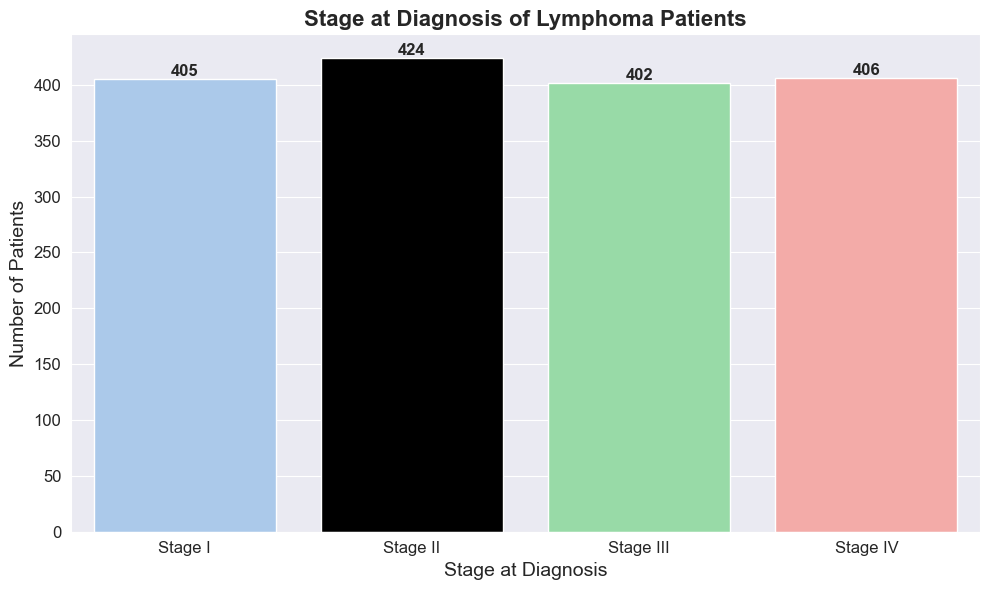

In [283]:
# Set seaborn style to darkgrid
plt.style.use('dark_background')      # <-- Night mode background
sns.set_style("darkgrid")   

# Plot for Lymphoma Eye Cancer and Stage of Diagnosis
lymphoma_df = eye_cancer_df[eye_cancer_df['Cancer_Type'] == 'Lymphoma']
lymphoma_mode = lymphoma_df['Stage_at_Diagnosis'].mode()[0]

plt.figure(figsize=(10, 6))
ax = sns.countplot(
    data=lymphoma_df,
    x='Stage_at_Diagnosis',
    palette='pastel',
    order=sorted(lymphoma_df['Stage_at_Diagnosis'].unique())
)

# Highlight the mode bar
for patch, label in zip(ax.patches, ax.get_xticklabels()):
    if label.get_text() == lymphoma_mode:
        patch.set_facecolor('black')  # Highlight color

# Add value labels on top of bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.title('Stage at Diagnosis of Lymphoma Patients', fontsize=16, fontweight='bold')
plt.xlabel('Stage at Diagnosis', fontsize=14)
plt.ylabel('Number of Patients', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()
# ...existing code...

#### **EDA Question 2: How does survival time vary between patients with and without the BRAF mutation**


In [284]:
eye_cancer_df.boxplot(column='Survival_Time_Months', by='Genetic_Mark', figsize=(10, 6))
plt.title('Survival Time in Months by Cancer Type')
plt.suptitle('')
plt.xlabel('Cancer Type')
plt.ylabel('Survival Time in Months')
plt.show()

KeyError: 'Genetic_Mark'

In [ ]:
eye_cancer_df.boxplot(column='Survival_Time_Months', by='Stage', figsize=(10, 6))


In [ ]:
eye_cancer_df['Cancer_Type'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5000 entries, 0 to 4999
Series name: Cancer_Type
Non-Null Count  Dtype 
--------------  ----- 
5000 non-null   object
dtypes: object(1)
memory usage: 39.2+ KB
